# Gas Radial flow

The PVT data from a gas well in the XYZ Gas Field is
given. 

The well is producing at a stabilized bottom-hole flowing pressure of
3600 psi. The wellbore radius is 0.3 ft. The following additional data is
available:

>k = 65 md   h = 15 ft   T = 600°R
pe = 4400 psi re = 1000 ft
Calculate the gas flow rate in Mscf/day

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Gas.txt', names= ['P(psi)' , 'mu_g' ,'z'],sep=' ')

In [95]:
k = 65
h = 15 
T = 600
re = 1000
rw = 0.3

In [7]:
df

,P(psi),mu_g,z
0,0,0.01270,1.000
1,400,0.01286,0.937
2,800,0.01390,0.882
3,1200,0.01530,0.832
4,1600,0.01680,0.794
5,2000,0.01840,0.770
6,2400,0.02010,0.763
7,2800,0.02170,0.775
8,3200,0.02340,0.797
9,3600,0.02500,0.827


In [8]:
df['2P/muZ'] = 2*df['P(psi)']/df['mu_g']/df['z']

In [9]:
df

,P(psi),mu_g,z,2P/muZ
0,0,0.01270,1.000,0.000000
1,400,0.01286,0.937,66391.033227
2,800,0.01390,0.882,130507.838627
3,1200,0.01530,0.832,188536.953243
4,1600,0.01680,0.794,239894.446444
5,2000,0.01840,0.770,282326.369283
6,2400,0.02010,0.763,312982.922869
7,2800,0.02170,0.775,332986.472425
8,3200,0.02340,0.797,343167.218951
9,3600,0.02500,0.827,348246.674728


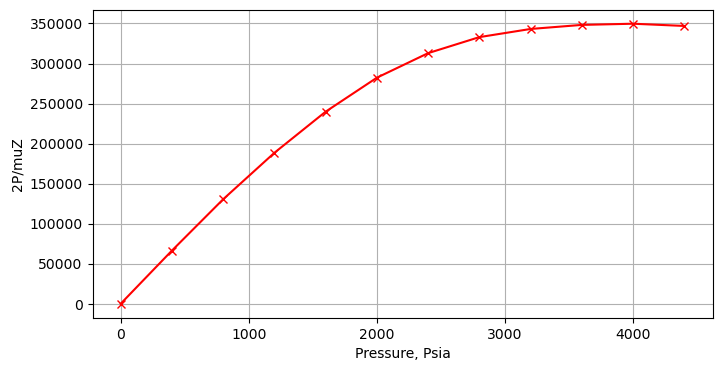

In [20]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(df['P(psi)'] , df['2P/muZ'] , marker = 'x',c='red',label='2P/muZ vs P')

plt.xlabel('Pressure, Psia')
plt.ylabel('2P/muZ')

plt.grid()

In [49]:
df = df.iloc[:,:4]

df

,P(psi),mu_g,z,2P/muZ
0,0,0.01270,1.000,0.000000
1,400,0.01286,0.937,66391.033227
2,800,0.01390,0.882,130507.838627
3,1200,0.01530,0.832,188536.953243
4,1600,0.01680,0.794,239894.446444
5,2000,0.01840,0.770,282326.369283
6,2400,0.02010,0.763,312982.922869
7,2800,0.02170,0.775,332986.472425
8,3200,0.02340,0.797,343167.218951
9,3600,0.02500,0.827,348246.674728


In [73]:
df['A_i'] = np.zeros((12,1))



for j in range(1, 12):
    
    df['A_i'][j] = (df['2P/muZ'][j] + df['2P/muZ'][j-1])*400/2

<ipython-input-73-27b47a4d8b2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A_i'][j] = (df['2P/muZ'][j] + df['2P/muZ'][j-1])*400/2


In [75]:
df['m(P)'] = np.cumsum(df['A_i'])

In [76]:
df

,P(psi),mu_g,z,2P/muZ,A_i,m(P)
0,0,0.01270,1.000,0.000000,0.000000e+00,0.000000e+00
1,400,0.01286,0.937,66391.033227,1.327821e+07,1.327821e+07
2,800,0.01390,0.882,130507.838627,3.937977e+07,5.265798e+07
3,1200,0.01530,0.832,188536.953243,6.380896e+07,1.164669e+08
4,1600,0.01680,0.794,239894.446444,8.568628e+07,2.021532e+08
5,2000,0.01840,0.770,282326.369283,1.044442e+08,3.065974e+08
6,2400,0.02010,0.763,312982.922869,1.190619e+08,4.256592e+08
7,2800,0.02170,0.775,332986.472425,1.291939e+08,5.548531e+08
8,3200,0.02340,0.797,343167.218951,1.352307e+08,6.900839e+08
9,3600,0.02500,0.827,348246.674728,1.382828e+08,8.283666e+08


In [77]:
# plt.style.use('default')
# plt.figure(figsize=(8,4))

# plt.plot(df['P(psi)'] , df['2P/muZ'] , marker = 'x',c='red',label='2P/muZ vs P')

# plt.xlabel('Pressure, Psia')
# plt.ylabel('2P/muZ')

# plt.grid()

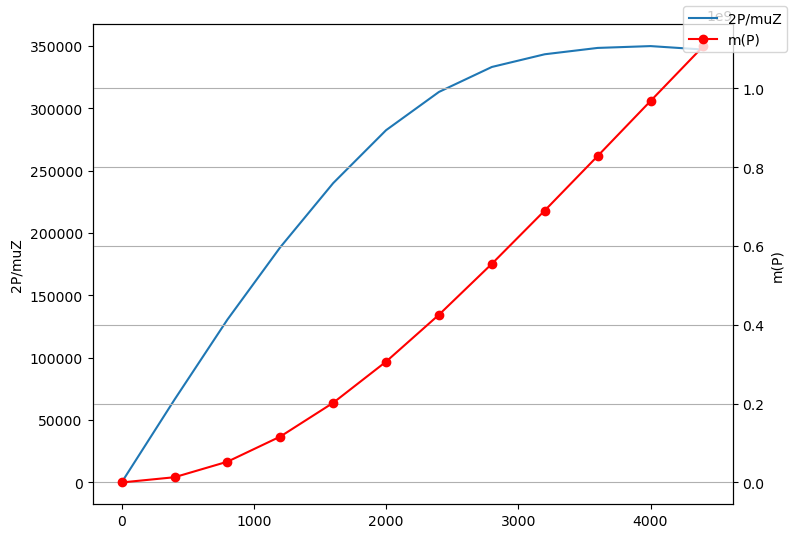

In [81]:
fig = plt.figure()

a1 = fig.add_axes([0,0,1,1])

x = df['P(psi)']
a1.plot(x,df['2P/muZ'])
a1.set_ylabel('2P/muZ')

a2 = a1.twinx()
a2.plot(x, df['m(P)'],'ro-')
a2.set_ylabel('m(P)')

fig.legend(labels = ('2P/muZ','m(P)'))

plt.grid()
plt.show()

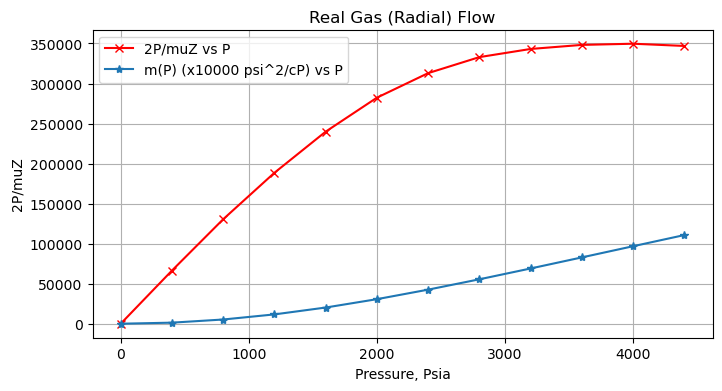

In [90]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(df['P(psi)'] , df['2P/muZ'] , marker = 'x',c='red',label='2P/muZ vs P')
plt.plot(df['P(psi)'] , df['m(P)']/10000 , marker = '*',label='m(P) (x10000 psi^2/cP) vs P')

plt.xlabel('Pressure, Psia')
plt.ylabel('2P/muZ')


plt.legend()
plt.title('Real Gas (Radial) Flow')

plt.grid()

## Now All we need to do is find the corresponding m(P) at Pe and Pwf and solve for the Flow Rate. 

In [104]:
# 1. m(Pwf)

m_Pwf = float(df[df['P(psi)'] == 3600]['m(P)'])

m_Pe =  float(df[df['P(psi)'] == 4400]['m(P)'])

In [105]:
Qg = k*h*(m_Pe - m_Pwf)/(1422*T*np.log(re/rw))

In [106]:
Qg

39293.270285254715

In [107]:
print(f'Gas Flow rate = {Qg} MSCF/Day.')

Gas Flow rate = 39293.270285254715 MSCF/Day.
